In [135]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [136]:
df=pd.read_excel('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Body%20Fat%20Percentage.xlsx')
df.head()

,Age,Weight(kg),Height(cm),Neck(cm),Waist(cm),Hip(cm),Body Fat Percentage
0,25,50,160,36.0,60,81,10.3
1,25,60,165,35.0,61,84,12.1
2,25,55,170,36.2,60,85,10.1
3,25,66,145,36.5,62,80,14.7
4,25,67,150,37.0,66,84,17.8


In [137]:
df.shape

(24, 7)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  24 non-null     int64  
 1   Weight(kg)           24 non-null     int64  
 2   Height(cm)           24 non-null     int64  
 3   Neck(cm)             24 non-null     float64
 4   Waist(cm)            24 non-null     int64  
 5   Hip(cm)              24 non-null     int64  
 6   Body Fat Percentage  24 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.4 KB


In [139]:
df.describe()

,Age,Weight(kg),Height(cm),Neck(cm),Waist(cm),Hip(cm),Body Fat Percentage
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,25.0,67.583333,164.208333,37.066667,67.208333,85.166667,15.341667
std,0.0,15.553321,13.141303,3.450478,7.700814,5.027461,5.057918
min,25.0,40.000000,140.000000,32.000000,55.000000,79.000000,8.100000
25%,25.0,57.000000,152.250000,35.000000,61.750000,80.750000,10.900000
50%,25.0,66.500000,166.500000,36.000000,65.000000,84.500000,15.050000
75%,25.0,77.000000,171.750000,37.250000,71.250000,89.000000,18.175000
max,25.0,100.000000,190.000000,46.000000,85.000000,99.000000,26.900000


In [140]:
df.corr().describe()

,Age,Weight(kg),Height(cm),Neck(cm),Waist(cm),Hip(cm),Body Fat Percentage
count,0.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,NaN,0.797677,0.445108,0.742516,0.796235,0.785603,0.546836
std,NaN,0.196217,0.386516,0.223565,0.200965,0.182303,0.413458
min,NaN,0.496722,-0.213185,0.453943,0.424459,0.482489,-0.213185
25%,NaN,0.679042,0.438385,0.563335,0.769146,0.709154,0.494258
50%,NaN,0.876763,0.481327,0.819013,0.838879,0.845045,0.642841
75%,NaN,0.911199,0.493163,0.868518,0.906686,0.869149,0.733555
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df.mean()

Age                     25.000000
Weight(kg)              67.583333
Height(cm)             164.208333
Neck(cm)                37.066667
Waist(cm)               67.208333
Hip(cm)                 85.166667
Body Fat Percentage     15.341667
dtype: float64

In [142]:
df.min()

Age                     25.0
Weight(kg)              40.0
Height(cm)             140.0
Neck(cm)                32.0
Waist(cm)               55.0
Hip(cm)                 79.0
Body Fat Percentage      8.1
dtype: float64

In [143]:
df.max()

Age                     25.0
Weight(kg)             100.0
Height(cm)             190.0
Neck(cm)                46.0
Waist(cm)               85.0
Hip(cm)                 99.0
Body Fat Percentage     26.9
dtype: float64

In [144]:
df.isnull().sum()

Age                    0
Weight(kg)             0
Height(cm)             0
Neck(cm)               0
Waist(cm)              0
Hip(cm)                0
Body Fat Percentage    0
dtype: int64

In [145]:
df=df.fillna(0)

In [146]:
list(df.columns)

['Age',
 'Weight(kg)',
 'Height(cm)',
 'Neck(cm)',
 'Waist(cm)',
 'Hip(cm)',
 'Body Fat Percentage']

In [147]:
df.shape

(24, 7)

In [148]:
df.dtypes

Age                      int64
Weight(kg)               int64
Height(cm)               int64
Neck(cm)               float64
Waist(cm)                int64
Hip(cm)                  int64
Body Fat Percentage    float64
dtype: object

In [149]:
df.head()

,Age,Weight(kg),Height(cm),Neck(cm),Waist(cm),Hip(cm),Body Fat Percentage
0,25,50,160,36.0,60,81,10.3
1,25,60,165,35.0,61,84,12.1
2,25,55,170,36.2,60,85,10.1
3,25,66,145,36.5,62,80,14.7
4,25,67,150,37.0,66,84,17.8


In [150]:
df=df.rename({'Body Fat Percentage':'Body_Fat_Percentage'},axis='columns')

In [151]:
x=df.drop(['Age'],axis='columns')

In [152]:
y=df.Age.values

In [153]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [154]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

100.0

In [155]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

100.0

In [158]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [159]:
from sklearn.ensemble import AdaBoostClassifier

In [160]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

100.0

In [161]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [162]:
from sklearn.ensemble import BaggingClassifier

In [163]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

100.0

In [164]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [165]:
from sklearn.naive_bayes import GaussianNB

In [166]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

100.0

In [167]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [168]:
from sklearn.ensemble import AdaBoostClassifier

In [169]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

100.0

In [170]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [171]:
from sklearn.ensemble import ExtraTreesClassifier

In [172]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

100.0

In [173]:
print(classification_report(ytest,pre_etc))

              precision    recall  f1-score   support

          25       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [174]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,DecisionTreeClassifier,100.0
1,RandomForestClassifier,100.0
2,KNeighborsClassifier,100.0
3,AdaBoostClassifier,100.0
4,BaggingClassifier,100.0
5,GaussianNB,100.0
6,AdaBoostClassifier,100.0
7,GradientBoostingClassifier,100.0
8,ExtraTreesClassifier,100.0


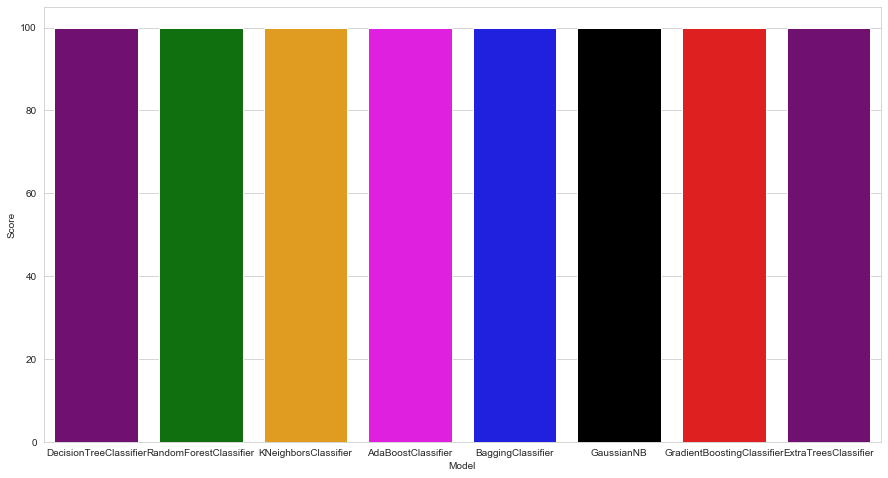

In [175]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [176]:
df.head()

,Age,Weight(kg),Height(cm),Neck(cm),Waist(cm),Hip(cm),Body_Fat_Percentage
0,25,50,160,36.0,60,81,10.3
1,25,60,165,35.0,61,84,12.1
2,25,55,170,36.2,60,85,10.1
3,25,66,145,36.5,62,80,14.7
4,25,67,150,37.0,66,84,17.8


In [177]:
df=df.rename({'Weight(kg)':'Weight'},axis='columns')

In [178]:
df=df.rename({'Height(cm)':'Height'},axis='columns')

In [179]:
df=df.rename({'Neck(cm)':'Neck'},axis='columns')

In [180]:
df=df.rename({'Waist(cm)':'Waist'},axis='columns')

In [181]:
df.head()

,Age,Weight,Height,Neck,Waist,Hip(cm),Body_Fat_Percentage
0,25,50,160,36.0,60,81,10.3
1,25,60,165,35.0,61,84,12.1
2,25,55,170,36.2,60,85,10.1
3,25,66,145,36.5,62,80,14.7
4,25,67,150,37.0,66,84,17.8


In [182]:
df=df.rename({'Hip(cm)':'Hip'},axis='columns')

In [183]:
import sklearn.cluster as cluster

In [184]:
kmns=cluster.KMeans(n_clusters=5)

In [187]:
kmns=kmns.fit(df[['Weight','Body_Fat_Percentage']])

In [188]:
kmns.cluster_centers_

array([[56.5  , 11.05 ],
       [93.25 , 20.525],
       [66.4  , 14.7  ],
       [42.   , 13.45 ],
       [76.2  , 19.46 ]])

In [189]:
df['Weight_Body_Fat_Percentage']=kmns.labels_

In [190]:
df.head()

,Age,Weight,Height,Neck,Waist,Hip,Body_Fat_Percentage,Weight_Body_Fat_Percentage
0,25,50,160,36.0,60,81,10.3,0
1,25,60,165,35.0,61,84,12.1,0
2,25,55,170,36.2,60,85,10.1,0
3,25,66,145,36.5,62,80,14.7,2
4,25,67,150,37.0,66,84,17.8,2


In [192]:
df['Weight_Body_Fat_Percentage'].value_counts()

0    8
2    5
4    5
1    4
3    2
Name: Weight_Body_Fat_Percentage, dtype: int64

In [193]:
from sklearn.cluster import KMeans 

In [194]:
k_range=range(1,12)
wss=[]

In [197]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Weight','Body_Fat_Percentage']])
    wss.append(km.inertia_)

In [198]:
wss

[6152.231666666667,
 2072.086222222222,
 1124.5336616161617,
 719.6915952380953,
 498.3145,
 322.8891666666667,
 248.45083333333335,
 181.9566666666667,
 137.1446666666667,
 98.35666666666668,
 87.315]

In [199]:
kmns1=cluster.KMeans(n_clusters=5)

In [200]:
kmns1=kmns1.fit(df[['Height','Body_Fat_Percentage']])

In [201]:
kmns1.cluster_centers_

array([[147.        ,  15.08      ],
       [180.83333333,  14.2       ],
       [153.75      ,  21.225     ],
       [167.16666667,  10.31666667],
       [167.66666667,  20.26666667]])

In [202]:
df['Height_Body_Fat_Percentage']=kmns1.labels_

In [203]:
k_range=range(1,12)
wcc=[]

In [204]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Height','Body_Fat_Percentage']])
    wcc.append(km.inertia_)

In [205]:
wcc

[4560.356666666667,
 1518.9954285714286,
 908.2622222222222,
 709.7572222222223,
 527.2433333333333,
 363.405,
 238.97500000000002,
 166.23933333333332,
 118.61133333333333,
 92.39083333333335,
 76.70583333333333]

In [207]:
kmns2=cluster.KMeans(n_clusters=5)

In [209]:
kmns2=kmns1.fit(df[['Hip','Body_Fat_Percentage']])

In [210]:
kmns2.cluster_centers_

array([[81.        , 11.04545455],
       [84.75      , 16.825     ],
       [90.25      , 16.3       ],
       [88.5       , 23.225     ],
       [99.        , 21.3       ]])

In [211]:
df['Hip_Body_Fat_Percentage']=kmns1.labels_

In [214]:
k_range=range(1,12)
wcs=[]

In [215]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Height','Body_Fat_Percentage']])
    wcs.append(km.inertia_)

In [217]:
wcs

[4560.356666666667,
 1518.9954285714286,
 908.2622222222222,
 709.7572222222223,
 524.7303333333333,
 365.91799999999995,
 238.97500000000002,
 166.23933333333332,
 118.61133333333333,
 92.08583333333333,
 76.70583333333333]

In [218]:
df

,Age,Weight,Height,Neck,Waist,Hip,Body_Fat_Percentage,Weight_Body_Fat_Percentage,Height_Body_Fat_Percentage,Hip_Body_Fat_Percentage
0,25,50,160,36.0,60,81,10.3,0,3,0
1,25,60,165,35.0,61,84,12.1,0,3,0
2,25,55,170,36.2,60,85,10.1,0,3,0
3,25,66,145,36.5,62,80,14.7,2,0,0
4,25,67,150,37.0,66,84,17.8,2,0,1
5,25,80,177,38.0,70,89,15.4,4,1,2
6,25,56,178,35.0,63,82,8.9,0,1,0
7,25,68,180,35.0,65,81,9.1,2,1,0
8,25,70,150,35.1,75,89,26.9,4,2,3
9,25,75,155,35.8,76,87,24.5,4,2,3
